a0 = 7.352155820749955, b0 = 0.0
a1 = -3.6760779103749774, b1 = 3.6760779103749774
a2 = 1.4704311641499912, b2 = -2.9408623282999815
a3 = -0.7352155820749962, b3 = 2.2056467462249865
a4 = 0.43247975416176204, b4 = -1.7299190166470477
a5 = -0.28277522387499693, b5 = 1.413876119374991
a6 = 0.1987069140743238, b6 = -1.19224148444594
a7 = -0.14704311641499965, b7 = 1.0293018149049926
a8 = 0.11311008954999857, b8 = -0.9048807163999938
a9 = -0.08966043683841039, b9 = 0.8069439315457274
a10 = 0.07279362198762246, b10 = -0.727936219876233


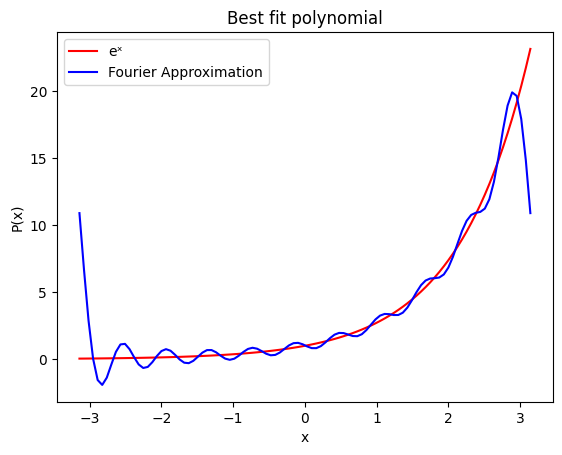

In [1]:
"""
111901030
Mayank Singla
Coding Assignment 5 - Q7
"""

# %%
import matplotlib.pyplot as plt
from numpy import linspace, linalg
from scipy.integrate import quad
from math import sqrt, pi, exp, cos, sin


def handleError(method):
    """
    Decorator Factory function.
    Returns a decorator that normally calls the method of a class by forwarding all its arguments to the method.
    It surrounds the method calling in try-except block to handle errors gracefully.
    """

    def decorator(ref, *args, **kwargs):
        """
        Decorator function that surrounds the method of a class in try-except block and call the methods and handles error gracefully.
        """
        try:
            # Return the same value as that of the method if any
            return method(ref, *args, **kwargs)
        except Exception as err:
            print(type(err))
            print(err)

    return decorator


def getSuperScript(inp):
    """
    Returns the superscript notation of the input number/string.
    """
    normal = "0123456789"
    super_s = "⁰¹²³⁴⁵⁶⁷⁸⁹"
    # Building the translation map
    trans = str.maketrans("".join(normal), "".join(super_s))
    # Returning the converted string
    return str(inp).translate(trans)


class Polynomial:
    """
    Represents an algebraic polynomial
    """

    @handleError
    def _validateCoefficients(self, coff):
        """
        Validates the list of coefficients
        Returns True if correct.
        """
        if not isinstance(coff, list):
            raise Exception("Invalid input - Expected list")

        for i in coff:
            if not isinstance(i, (int, float)):
                raise Exception(
                    f"Invalid type of coefficient received {type(i)}.\nExpected float or int."
                )

        return True

    @handleError
    def __init__(self, coff):
        """
        Initializes the polynomial with the list of coefficients.
        """
        if not self._validateCoefficients(coff):
            return
        self.degree = max(0, len(coff) - 1)
        self.coff = coff

    @handleError
    def __str__(self):
        """
        Returns a string representation of the polynomial.
        """
        ans = "Coefficients of the polynomial are:\n"
        if len(self.coff) == 0:
            ans += "0"
        else:
            ans += " ".join(str(i) for i in self.coff)
        return ans

    @handleError
    def _addOrSub(self, p, isAdd=True):
        """
        Adds or subtracts the polynomial with the polynomial passed as argument.
        """
        # Raising the exception if the input is not a Polynomial object
        if not isinstance(p, Polynomial):
            raise Exception("Invalid input - Expected Polynomial")

        # Evaluating the summation of the two polynomials
        ansCoff = []
        n, m = self.degree + 1, p.degree + 1
        for i in range(max(n, m)):
            sumCoff = 0
            if i < n:
                sumCoff += self.coff[i]
            if i < m:
                sumCoff += p.coff[i] if isAdd else (-p.coff[i])
            ansCoff.append(sumCoff)
        return Polynomial(ansCoff)

    @handleError
    def __add__(self, p):
        """
        Overloading the + operator for the polynomial class
        """
        return self._addOrSub(p, isAdd=True)

    @handleError
    def __sub__(self, p):
        """
        Overloading the - operator for the polynomial class
        """
        return self._addOrSub(p, isAdd=False)

    @handleError
    def __mul__(self, p):
        """
        Overloading the * operator for the polynomial class to multiply it with a polynomial
        """
        # Raising the exception if the input is not a Polynomial object
        if not isinstance(p, Polynomial):
            raise Exception("Invalid input - Expected Polynomial")

        # Evaluating the multiplication of the two polynomials
        ansCoff = dict()
        n, m = self.degree + 1, p.degree + 1
        for i in range(n):
            for j in range(m):
                ansCoff[i + j] = ansCoff.get(i + j, 0) + self.coff[i] * p.coff[j]

        ansCoff = [ansCoff[i] for i in sorted(ansCoff.keys())]
        return Polynomial(ansCoff)

    @handleError
    def __rmul__(self, scalar):
        """
        Overloading the * operator for the polynomial class to pre-multiply it with a scalar
        """
        if not isinstance(scalar, (int, float)):
            raise Exception("Invalid input - Expected scalar")
        return Polynomial([scalar * i for i in self.coff])

    @handleError
    def __getitem__(self, x):
        """
        Evaluate the polynomial at the given real number `x`.
        """
        ans = 0
        for i in range(self.degree + 1):
            ans += self.coff[i] * (x**i)
        return ans

    @handleError
    def _getPolyString(self):
        """
        Returns the actual string representation of the polynomial.
        """
        ans = ""
        for i in range(self.degree + 1):
            if self.coff[i] != 0:
                if i == 0:
                    ans += (
                        f"{self.coff[i]:.2f}"
                        if isinstance(self.coff[i], float)
                        else f"{self.coff[i]}"
                    )
                else:
                    ans += " + " if self.coff[i] > 0 else " - "
                    if abs(self.coff[i]) != 1:
                        ans += (
                            f"{abs(self.coff[i]):.2f}"
                            if isinstance(self.coff[i], float)
                            else f"{abs(self.coff[i])}"
                        )
                    ans += f"x{getSuperScript(i)}" if i != 1 else "x"
        return ans

    @handleError
    def _plotPolynomial(self, a, b, l="", c="blue"):
        """
        Plots the polynomial in the given interval [a, b]
        """
        a = min(a, b)
        b = max(a, b)
        numPoints = 100
        xpoints = list(linspace(a, b, numPoints))
        ypoints = [self[i] for i in xpoints]
        plt.plot(xpoints, ypoints, c, label=l)
        plt.grid()

    @handleError
    def show(self, a, b):
        """
        Visualize the polynomial in the given interval [a, b]
        """
        if not isinstance(a, (int, float)) or not isinstance(b, (int, float)):
            raise Exception("Invalid input - Expected scalar")
        plt.title(f"Plot of the polynomial {self._getPolyString()}")
        plt.xlabel("x")
        plt.ylabel("P(x)")
        self._plotPolynomial(a, b)
        plt.show()

    @handleError
    def fitViaMatrixMethod(self, points):
        """
        Using the idea of linear systems, it fits a polynomial to the points passed as its argument.
        Displays a plot with the given points and the computed polynomial.
        """
        # Raising the exception if the input is not valid
        if not isinstance(points, list):
            raise Exception("Invalid input - Expected list of tuples")
        for i in points:
            if not isinstance(i, tuple) or len(i) != 2:
                raise Exception("Invalid input - Expected list of tuples")
            if not isinstance(i[0], (int, float)) or not isinstance(i[1], (int, float)):
                raise Exception(
                    "Invalid input - Expected list of tuples representing points"
                )

        # Creating the matrix and the vector b
        degree = len(points) - 1
        A, b = [], []
        minX, maxX = 0, 0
        xpoints, ypoints = [], []
        for p in points:
            A.append([p[0] ** j for j in range(degree + 1)])
            b.append(p[1])
            minX = min(minX, p[0])
            maxX = max(maxX, p[0])
            xpoints.append(p[0])
            ypoints.append(p[1])

        # Solving the linear system
        x = list(linalg.solve(A, b))
        ans = Polynomial(x)

        # Plotting the given points and the computed polynomial
        plt.title(
            f"Polynomial interpolation using matrix method\nComputed Polynomial {ans._getPolyString()}"
        )
        plt.xlabel("x")
        plt.ylabel("f̃(x)")
        plt.plot(xpoints, ypoints, "ro")
        ans._plotPolynomial(minX, maxX)
        plt.show()

    @handleError
    def fitViaLagrangePoly(self, points):
        """
        Computes the Lagrange polynomial for the points passed as argument to this method.
        Displays a plot with the given points and the computed polynomial.
        """
        # Raising the exception if the input is not valid
        if not isinstance(points, list):
            raise Exception("Invalid input - Expected list of tuples")
        for i in points:
            if not isinstance(i, tuple) or len(i) != 2:
                raise Exception("Invalid input - Expected list of tuples")
            if not isinstance(i[0], (int, float)) or not isinstance(i[1], (int, float)):
                raise Exception(
                    "Invalid input - Expected list of tuples representing points"
                )

        # Calculating some required values
        degree = len(points) - 1
        minX, maxX = 0, 0
        xpoints, ypoints = [], []
        for p in points:
            minX = min(minX, p[0])
            maxX = max(maxX, p[0])
            xpoints.append(p[0])
            ypoints.append(p[1])

        # Evaluating the Lagrange polynomial
        ansP = Polynomial([0])
        for j in range(degree + 1):
            # Evaluating Ψⱼ
            numerator, denominator = Polynomial([1]), 1
            for i in range(degree + 1):
                if i == j:
                    continue
                numerator = numerator * Polynomial([-xpoints[i], 1])
                denominator *= xpoints[j] - xpoints[i]
            ansP = ansP + ((ypoints[j] / denominator) * numerator)

        # Plotting the given points and the computed polynomial
        plt.title(
            f"Interpolation using Lagrange polynomial\nComputed Polynomial {ansP._getPolyString()}"
        )
        plt.xlabel("x")
        plt.ylabel("f̃(x)")
        plt.plot(xpoints, ypoints, "ro")
        ansP._plotPolynomial(minX, maxX)
        plt.show()

    @handleError
    def derivative(self):
        """
        Returns the derivative of the polynomial
        """
        # Calculating the coefficients of the derivative polynomial
        result_coff = []
        for i in range(1, len(self.coff)):
            result_coff.append(i * self.coff[i])
        return Polynomial(result_coff)

    @handleError
    def integral(self):
        """
        Returns the integral of the polynomial
        """
        # Calculating the coefficients of the integral polynomial
        result_coff = [0]
        for i in range(len(self.coff)):
            result_coff.append(self.coff[i] / (i + 1))
        return Polynomial(result_coff)

    @handleError
    def area(self, a, b):
        """
        Returns the area under the polynomial in the interval [a, b]
        """
        # Checking input
        if not isinstance(a, (int, float)) or not isinstance(b, (int, float)):
            raise Exception("Invalid input - Expected scalar")
        if a > b:
            raise Exception("Invalid input - Expected a <= b")

        # The integral of the polynomial
        int_p = self.integral()

        # Returning answer
        return int_p[b] - int_p[a]

    @handleError
    def bestFitPoints(self, pts, n):
        """
        Compute the polynomial of degree n that is the best fit for a given set of points
        """
        # Raising the exception if the input is not valid
        if n < 0:
            raise Exception("Expected  a non-negative integer")

        m = len(pts)  # Number of points

        # Given x and the y points
        xpts = [p[0] for p in pts]
        ypts = [p[1] for p in pts]

        # SA = b
        # Creating the vector b
        b = []
        for j in range(0, n + 1):
            bsum = 0
            for i in range(m):
                bsum += ypts[i] * (xpts[i] ** j)
            b.append(bsum)

        # Creating the matrix S
        S = []
        for j in range(0, n + 1):
            row = []
            for k in range(0, n + 1):
                csum = 0
                for i in range(m):
                    csum += xpts[i] ** (j + k)
                row.append(csum)
            S.append(row)

        # Solving the linear system
        A = list(linalg.solve(S, b))
        ans = Polynomial(A)

        # Plotting the given points and the computed polynomial
        plt.title("Best fit polynomial")
        plt.xlabel("x")
        plt.ylabel("f(x)")

        # Plotting the given points
        plt.plot(xpts, ypts, "ro", label="Input Points")

        # Plotting the computed polynomial
        ans._plotPolynomial(min(xpts), max(xpts), ans._getPolyString())

        plt.legend()
        plt.show()

        return ans

    @handleError
    def bestFitFunction(self, f, func_str, x, y, n):
        """
        Computes the polynomial of degree n that best approximates the function in [a, b]
        """
        if n < 0:
            raise Exception("Expected  a non-negative integer")

        # SA = b
        # Creating the vector b
        b = []
        for j in range(0, n + 1):
            b.append(quad(lambda x: (x**j) * f(x), x, y)[0])

        # Creating the matrix S
        S = []
        for j in range(0, n + 1):
            row = []
            for k in range(0, n + 1):
                row.append(quad(lambda x: x ** (j + k), x, y)[0])
            S.append(row)

        # Solving the linear system
        A = list(linalg.solve(S, b))
        ans = Polynomial(A)

        # Plotting the given points and the computed polynomial
        plt.title("Best fit polynomial")
        plt.xlabel("x")
        plt.ylabel("P(x)")

        # Plotting the actual function
        xpts = linspace(x, y, 100)
        ypts = [f(i) for i in xpts]
        plt.plot(xpts, ypts, "r", label=func_str)

        # Plotting the computed polynomial
        ans._plotPolynomial(x, y, ans._getPolyString())

        plt.legend()
        plt.show()

        return ans

    @handleError
    def __pow__(self, n):
        """
        Computes the non-negative nth power of the polynomial
        """
        if n < 0:
            raise Exception("Expected  a non-negative integer")

        ans = Polynomial([1])
        for _ in range(n):
            ans = ans * self

        return ans

    @handleError
    def computeNthLegendrePoly(self, n):
        """
        Computes the nth legendre polynomial
        Lₙ(x) = (1 / 2ⁿ n!) (dⁿ/dxⁿ (x² - 1)ⁿ)
        """
        if n < 0:
            raise Exception("Expected  a non-negative integer")

        # Calculating the numerator
        numer = Polynomial([-1, 0, 1]) ** n
        for i in range(n):
            numer = numer.derivative()

        # Calculating the denominator
        denom = 2**n
        for i in range(1, n + 1):
            denom *= i

        # Returning the result
        return (1 / denom) * numer

    @handleError
    def bestFitLegendrePoly(self, f, func_str, n):
        """
        Computes the best fit polynomial for the input function using first n Legendre Polynomials
        """
        if n < 0:
            raise Exception("Expected  a non-negative integer")

        # The interval
        a = -1
        b = 1

        def w(x):
            """
            The weight function for Legendre Polynomials
            """
            return 1

        lpolys = []  # The list of Legendre Polynomials
        for i in range(n + 1):
            lpolys.append(self.computeNthLegendrePoly(i))

        ajs = []  # The list of coefficients of the polynomial
        for j in range(n + 1):
            cj = quad(lambda x: w(x) * lpolys[j][x] * lpolys[j][x], a, b)[0]
            aj = (1 / cj) * quad(lambda x: w(x) * lpolys[j][x] * f(x), a, b)[0]
            ajs.append(aj)

        # Computing the Qₙ(x)
        ans = Polynomial([0])
        for i in range(n + 1):
            ans = ans + (ajs[i] * lpolys[i])

        # Plotting the actual function
        xpts = linspace(a, b, 100)
        ypts = [f(i) for i in xpts]
        plt.plot(xpts, ypts, "r", label=func_str)

        # Plotting the computed polynomial
        ans._plotPolynomial(a, b, ans._getPolyString())

        plt.legend()
        plt.show()

        return ans

    @handleError
    def computeNthChebyshevPoly(self, n):
        """
        Computes the nth legendre polynomial
        Tₙ(x) = cos(n cos⁻¹(x))
        Tₙ₊₁(x) = 2xTₙ(x) - Tₙ₋₁(x)
        """
        if n < 0:
            raise Exception("Expected  a non-negative integer")

        # Base polynomials
        t0 = Polynomial([1])
        t1 = Polynomial([0, 1])

        if n == 0:
            return t0
        elif n == 1:
            return t1

        # Applying the recursive formula
        for _ in range(2, n + 1):
            tn = 2 * t1 * Polynomial([0, 1]) - t0
            t0 = t1
            t1 = tn

        return t1

    @handleError
    def demonstrateOrthogonalityChebyshevPoly(self, n):
        """
        Demonstrates the orthogonality of the Chebyshev Polynomials
        """
        if n < 0:
            raise Exception("Expected  a non-negative integer")

        # The interval
        a = -1
        b = 1

        def w(x):
            """
            The weight function for Chebyshev Polynomials
            """
            return 1 / sqrt(1 - x**2)

        cpolys = []  # The list of Chebyshev Polynomials
        for i in range(n):
            cpolys.append(self.computeNthChebyshevPoly(i))
            print(cpolys[i])

        # Calculating ∫w(x)ϕᵢ(x)ϕⱼ(x) for all possible combinations of i and j
        mat = []
        for i in range(n):
            row = []
            for j in range(i + 1):
                integrand = lambda x: w(x) * cpolys[i][x] * cpolys[j][x]
                row.append(quad(integrand, a, b)[0])

            mat.append(row)

        # Displaying the results, we can conclude the orthogonality of the polynomials
        print(mat)

    @handleError
    def bestFitFourierSeries(self, f, func_str, n):
        """
        Computes the best fit Fourier approximation Sₙ(x) of the input function
        """
        if n < 0:
            raise Exception("Expected  a non-negative integer")

        # The interval
        a = -pi
        b = pi

        coefficients = []

        def w(x):
            """
            The weight function for Fourier Series
            """
            return 1

        for k in range(0, n + 1):
            ak = (1 / pi) * quad(lambda x: f(x) * cos(k * x), a, b)[0]
            bk = (1 / pi) * quad(lambda x: f(x) * sin(k * x), a, b)[0]
            coefficients.append((ak, bk))
            print(f"a{k} = {ak}, b{k} = {bk}")

        # Plotting the actual function and the approximate function together
        xpts = linspace(a, b, 100)
        ypts1 = []
        ypts2 = []
        for x in xpts:
            ypts1.append(f(x))
            s1, s2 = 0, 0
            for k in range(1, n + 1):
                s1 += coefficients[k][0] * cos(k * x)
                s2 += coefficients[k][1] * sin(k * x)
            ypts2.append((coefficients[0][0] / 2) + s1 + s2)

        plt.title("Best fit polynomial")
        plt.xlabel("x")
        plt.ylabel("P(x)")

        plt.plot(xpts, ypts1, "r", label=func_str)
        plt.plot(xpts, ypts2, "b", label="Fourier Approximation")

        plt.legend()
        plt.show()


if __name__ == "__main__":
    # Testing the function
    p = Polynomial([])
    p.bestFitFourierSeries(lambda x: exp(x), "eˣ", 10)